# Projeto 1 - Ciência dos dado

Lais Nascimento da Silva | 2B engenharia

**Pergunta**:
Analisando dados de países que são da Organização Internacional do Trabalho, observa-se uma queda maior da taxa de trabalho infantil, depois que entraram nessa organização, compado com países que não participam desse grupo? A queda na taxa de trabalho infantil inflencia as taxas de alfabetização e de qualificação de mão de obra?

**Hipótese**:
A Organização Internacional do Trabalho (OIT), tem como um de seus principais objetivos erradicar o trabalho infantil, dessa maneira, a OIT age com o intuito de atingir esse objetivo, assim a tendência das taxas de trabalho infantil nos países que entram na organização é diminuir. O trabalho infantil na maioria das vezes priva a criança de frenquentar a escola e desse modo, menos crianças se alfabetizam. Portanto, a hipótese analisada será de que quando um país entra na OIT as taxas de trabalho infantil caem de maneira mais intensa e consequentemente as taxas de alfabetização aumentam, pois as crianças poderão frenquentar a escola regurlamente.

link OIT e trabalho infantil: https://www.ilo.org/brasilia/temas/trabalho-infantil/lang--pt/index.htm
https://www.ilo.org/global/docs/WCMS_714085/lang--en/index.htm



**Taxas de trabalho infantil, Taxas de alfabetização**
Os dados foram tirados do site: https://www.gapminder.org/data/

**Análise de dados:**


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [3]:
import os

os.getcwd()


'C:\\Users\\User\\Desktop\\2ºsemestre\\Ciência dos dados\\Projeto1_Ciencia_dos_Dados'

In [4]:
#Leitura dos arquivos em Excel
trab_inf= pd.read_excel('trab_infantil.xlsx')
alfab = pd.read_excel('alfabetizacao.xlsx')

In [5]:
#Tabela de trabalho infantil nos países em cada ano

trab_inf.head(3)

,country,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,36.6,NaN,NaN,...,NaN,NaN,NaN,5.5,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN


In [6]:
#tabela de taxa de alfabetização em cada país por ano

alfab.head(3)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,72.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.30,13.70,12.800,9.530,5.63,3.84,4.400,4.340,2.940,NaN
2,Algeria,NaN,NaN,NaN,32.5,28.6,26.2,24.2,22.6,21.6,...,1.03,1.11,0.949,0.889,NaN,NaN,0.733,0.769,0.557,NaN


**Grupos Analisados**
Dentre os países que estão nas tabelas de taxa de trabalho infantil e taxa de alfabetização, a maioria está dentro do Organização, os poucos que não são membros, não têm dados suficientes.
Portanto a separação será em dois grupos, divididos a partir de dados do relatório do OIT,a partir de informações referentes a pobreza e infraestrutura.
A seleção foi feita de acordo com o seguinte gráfico:

retatório: https://www.ilo.org/wcmsp5/groups/public/---dgreports/---dcomm/documents/publication/wcms_243961.pdf

<img src=referenciapaises.png width="650">

In [7]:
TI_bons_2006=['Afghanistan', 'Angola', 'Argentina', 'Armenia', 'Bangladesh', 'Belarus', 'Bosnia and Herzegovina', 'Brazil', 'Burkina Faso', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Dominican Republic', 'Egypt', 'Gabon', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Jordan', 'Kazakhstan', 'Liberia', 'Malawi', 'Mali', 'Mexico', 'Moldova', 'Morocco', 'Mozambique', 'Niger', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Romania', 'Serbia', 'Sierra Leone', 'Somalia', 'Sri Lanka', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Timor-Leste', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Zimbabwe']
TI_ruins_2006=['Zambia', 'Azerbaijan', 'Algeria', 'Albania', 'Benin', 'Burundi', 'Bolivia', "Cote d'Ivoire", 'Cambodia', 'Cameroon', 'El Salvador', 'Ecuador', 'Ethiopia', 'Ghana', 'Gambia', 'Georgia', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', 'Lao', 'Lesotho',  'Madagascar', 'Mongolia', 'Mauritania', 'Nepal', 'Nicaragua', 'Nigeria', 'Philippines', 'Pakistan', 'Rwanda', 'Senegal','Sudan', 'South Africa', 'Tajikistan', 'Uganda', 'Namibia', 'Vietnam', 'Yemen']

In [8]:
trab_inf_idx = trab_inf.set_index('country')

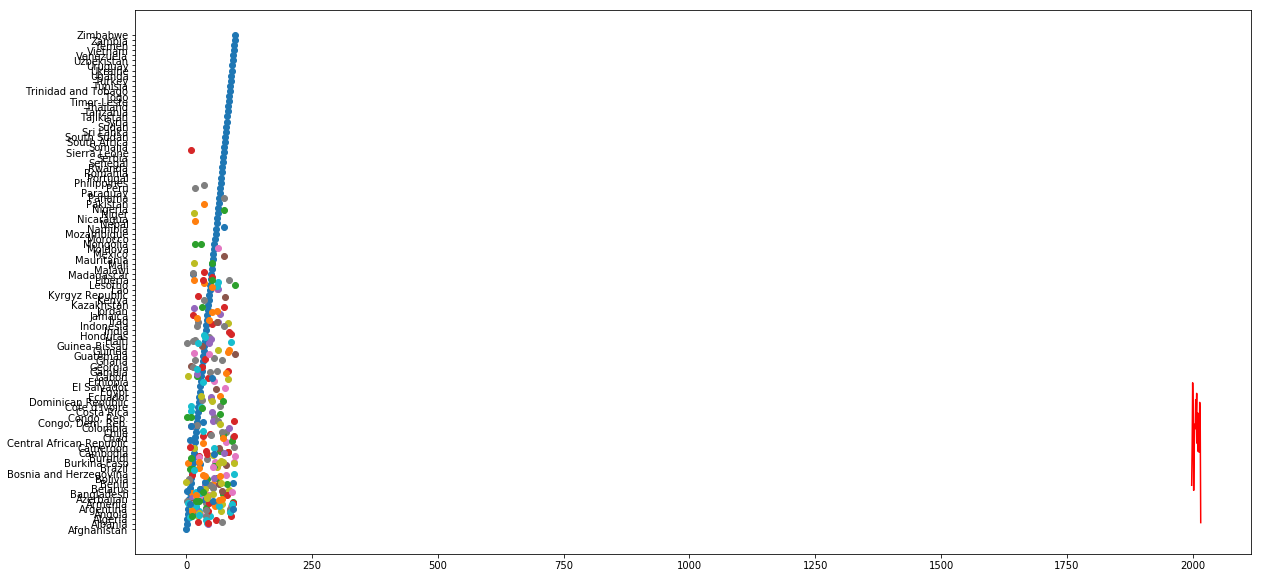

In [52]:
medias_trab_inf= trab_inf.mean()
plt.figure(figsize=(20,10))
for pais in trab_inf.columns:
    plt.scatter(x=trab_inf.index, y=trab_inf[pais])
plt.plot(medias_trab_inf.index, medias_trab_inf , color="r")

In [9]:
trab_inf_idx.loc[:,"ORG"] = 0

In [10]:
trab_inf_idx.loc[TI_bons_2006, "ORG"] =1
TI=trab_inf_idx


In [11]:
trab_inf_idx.loc[TI_ruins_2006, "ORG"] =2
TI=trab_inf_idx

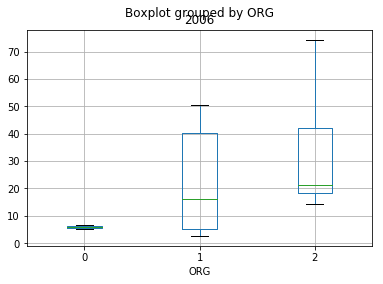

In [12]:
TI.boxplot([2006], by="ORG")

Observando o gráfico é possivel notar que os países que estão na lista de menos favorecidos, tem a taxa de trabalho infantil maior do que a de países que são melhores, mostrando que dentro da Organuzação há uma separação e onde há infraestrutura para imprementar politicas contra o trabalho infantil as taxas são menores.

In [13]:
#Tabela de trabalho infantil apenas com os países que estão na OIT no ano de 2006
TI_org_bons_2006= TI.loc[(TI.ORG==1), [2006]]
TI_org_bons_2006.head(3)

,2006
country,
Afghanistan,NaN
Angola,NaN
Argentina,NaN


In [14]:
#Tabela de trabalho infantil apenas com os países que estão na OIT no ano de 2006
TI_org_ruins_2006= TI.loc[(TI.ORG==2), [2006]]
TI_org_ruins_2006.head(3)

,2006
country,
Albania,NaN
Algeria,NaN
Azerbaijan,NaN


In [15]:
AF_bons_2006=['Afghanistan', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominica', 'Dominican Republic', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Morocco', 'Montenegro', 'Mozambique', 'Myanmar', 'Netherlands', 'New Zealand', 'Niger', 'Norway', 'Oman', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'San Marino', 'Sao Tome and Principe', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'South Africa', 'Solomon Islands', 'Spain', 'Sri Lanka', 'Suriname', 'Sweden', 'Tanzania', 'Thailand', 'Togo', 'Timor-Leste', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Zimbabwe']
AF_ruins_2006=['Zambia', 'Azerbaijan', 'Albania', 'Benin', 'Burundi', 'Bolivia', "Cote d'Ivoire", 'Comoros', 'Cambodia', 'Cameroon', 'El Salvador', 'Ecuador', 'Ethiopia', 'Ghana', 'Gambia', 'Georgia', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', 'Lao', 'Lesotho',  'Madagascar', 'Mongolia', 'Mauritania', 'Nepal', 'Nicaragua', 'Nigeria', 'Philippines', 'Pakistan', 'Rwanda', 'Senegal','Sudan', 'Switzerland', 'Tajikistan', 'Uganda', 'Namibia', 'Vietnam', 'Yemen', 'Djibouti' ]

In [16]:
alfab_idx = alfab.set_index('country')

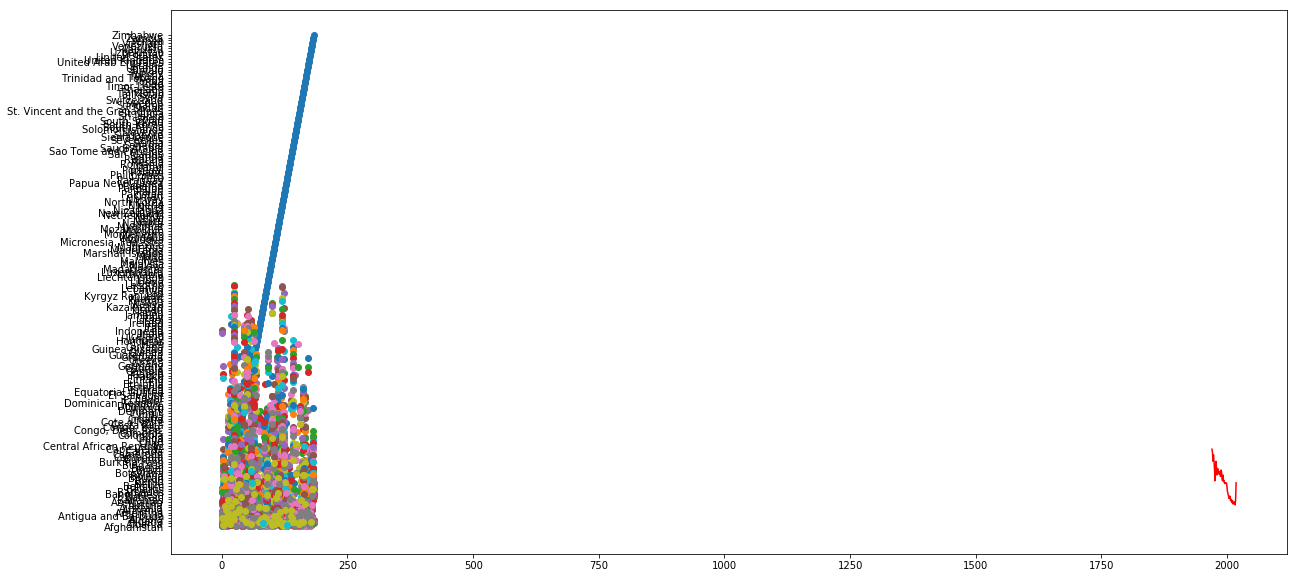

In [57]:
medias_alfab= alfab.mean()
plt.figure(figsize=(20,10))
for pais in alfab.columns:
    plt.scatter(x=alfab.index, y=alfab[pais])
plt.plot(medias_alfab.index, medias_alfab , color="r")

In [17]:
alfab_idx.loc[:,"ORG"] = 0

In [18]:
alfab_idx.loc[AF_bons_2006, "ORG"] =1
AF=alfab_idx

In [19]:
alfab_idx.loc[AF_ruins_2006, "ORG"] =2
AF=alfab_idx

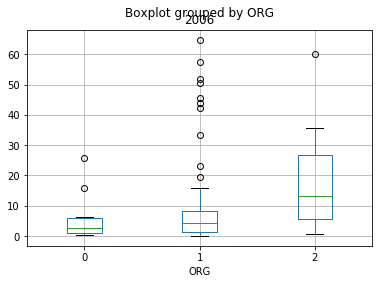

In [20]:
AF.boxplot([2006], by="ORG")

In [21]:
#Tabela de taxa de alfabetização de 2006 apenas com os membros da OIT
AF_org_bons_2006= AF.loc[(AF.ORG==1), [2006]]
AF_org_bons_2006.head(3)

,2006
country,
Afghanistan,NaN
Algeria,4.32
Angola,NaN


In [22]:
#Tabela de taxa de alfabetização de 1994 apenas com os paises não membros da OIT
AF_org_ruins_2006= AF.loc[(AF.ORG==2), [2006]]
AF_org_ruins_2006.head(3)

,2006
country,
Albania,NaN
Azerbaijan,16.2
Benin,13.2


In [23]:
#juntando as taxas de alfabetização e trabalho infantil dos "bons"
tral_bom = TI_org_bons_2006.join(AF_org_bons_2006, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral_bom.head(3)

,2006_trab_inf,2006_alfab
country,,
Afghanistan,NaN,NaN
Angola,NaN,NaN
Argentina,NaN,0.529


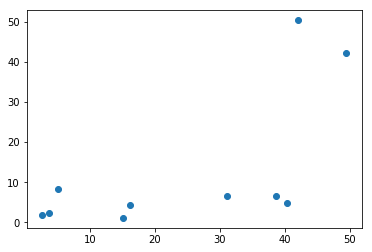

In [24]:
plt.scatter(tral_bom["2006_trab_inf"], tral_bom['2006_alfab'])

In [25]:
tral_ruim = TI_org_ruins_2006.join(AF_org_ruins_2006, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral_ruim.head()

,2006_trab_inf,2006_alfab
country,,
Albania,NaN,NaN
Azerbaijan,NaN,16.20
Benin,74.4,13.20
Bolivia,NaN,3.06
Burundi,NaN,24.30


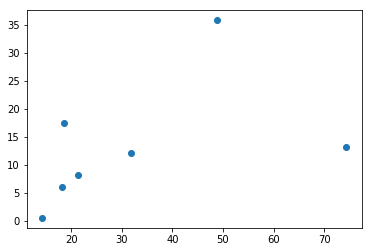

In [26]:
plt.scatter(tral_ruim["2006_trab_inf"], tral_ruim['2006_alfab'])

A mesma analise será feita, para o ano de 2012, pois entre 2006 e 2012 mais países entraram na organização

In [27]:
TI_bons_2012=['Afghanistan', 'Angola', 'Argentina', 'Armenia', 'Bangladesh', 'Belarus', 'Bosnia and Herzegovina', 'Brazil', 'Burkina Faso', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Dominican Republic', 'Egypt', 'Gabon', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Jordan', 'Kazakhstan', 'Liberia', 'Malawi', 'Mali', 'Mexico', 'Moldova', 'Morocco', 'Mozambique', 'Niger', 'Panama', 'Paraguay', 'Peru', 'Portugal', 'Romania', 'Serbia', 'Sierra Leone', 'Somalia', 'Sri Lanka', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Timor-Leste', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Zimbabwe']
TI_ruins_2012=['Zambia', 'Azerbaijan', 'Algeria', 'Albania', 'Benin', 'Burundi', 'Bolivia', "Cote d'Ivoire", 'Cambodia', 'Cameroon', 'El Salvador', 'Ecuador', 'Ethiopia', 'Ghana', 'Gambia', 'Georgia', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', 'Lao', 'Lesotho',  'Madagascar', 'Mongolia', 'Mauritania', 'Nepal', 'Nicaragua', 'Nigeria', 'Philippines', 'Pakistan', 'Rwanda', 'Senegal','Sudan', 'South Africa', 'South Sudan', 'Tajikistan', 'Uganda', 'Namibia', 'Vietnam', 'Yemen']

In [28]:
trab_inf_idx.loc[TI_bons_2012, "ORG"] =1
TI_2012=trab_inf_idx

In [29]:
trab_inf_idx.loc[TI_ruins_2012, "ORG"] =2
TI_2012=trab_inf_idx

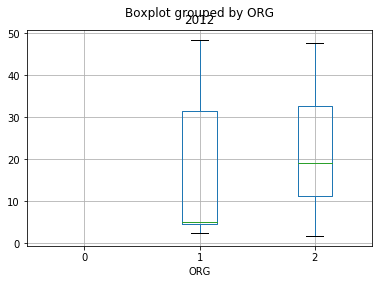

In [30]:
TI_2012.boxplot([2012], by="ORG")

In [31]:
TI_org_bons_2012= TI_2012.loc[(TI_2012.ORG==1), [2012]]
TI_org_bons_2012.head(3)

,2012
country,
Afghanistan,NaN
Angola,NaN
Argentina,5.03


In [32]:
TI_org_ruins_2012= TI_2012.loc[(TI_2012.ORG==2), [2012]]
TI_org_ruins_2012.head(3)

,2012
country,
Albania,NaN
Algeria,NaN
Azerbaijan,NaN


In [33]:
AF_bons_2012=['Afghanistan', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Botswana', 'Brazil', 'Bulgaria', 'Brunei', 'Burkina Faso', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominica', 'Dominican Republic', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Morocco', 'Montenegro', 'Marshall Islands', 'Mozambique', 'Myanmar', 'Netherlands', 'New Zealand', 'Niger', 'Norway', 'Oman', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'San Marino', 'Sao Tome and Principe', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'South Africa', 'Solomon Islands', 'Spain', 'Sri Lanka', 'Suriname', 'Sweden', 'Tanzania', 'Thailand', 'Togo', 'Timor-Leste', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Zimbabwe']
AF_ruins_2012=['Zambia', 'Azerbaijan', 'Albania', 'Benin', 'Burundi', 'Bolivia', "Cote d'Ivoire", 'Comoros', 'Cambodia', 'Cameroon', 'El Salvador', 'Ecuador', 'Ethiopia', 'Ghana', 'Gambia', 'Georgia', 'Guatemala', 'Honduras', 'India', 'Indonesia', 'Jamaica', 'Kenya', 'Lao', 'Lesotho',  'Madagascar', 'Maldives', 'Mongolia', 'Mauritania', 'Nepal', 'Nicaragua', 'Nigeria', 'Philippines', 'Pakistan', 'Rwanda', 'Senegal','Sudan', 'Switzerland', 'Tajikistan', 'Uganda', 'Namibia', 'Vietnam', 'Yemen', 'Djibouti' ]

In [34]:
alfab_idx.loc[AF_bons_2012, "ORG"] =1
AF_2012=alfab_idx

In [35]:
alfab_idx.loc[AF_ruins_2012, "ORG"] =2
AF_2012=alfab_idx

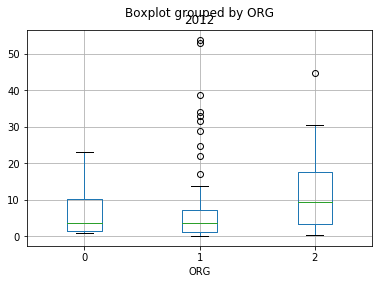

In [36]:
AF_2012.boxplot([2012], by="ORG")

In [37]:
AF_org_bons_2012= AF_2012.loc[(AF_2012.ORG==1), [2012]]
AF_org_bons_2012.head(3)

,2012
country,
Afghanistan,NaN
Algeria,0.889
Angola,NaN


In [38]:
AF_org_ruins_2012= AF_2012.loc[(AF_2012.ORG==2), [2012]]
AF_org_ruins_2012.head(3)

,2012
country,
Albania,9.53
Azerbaijan,10.70
Benin,4.49


In [39]:
tral_bom_2012 = TI_org_bons_2012.join(AF_org_bons_2012, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral_bom_2012.head()

,2012_trab_inf,2012_alfab
country,,
Afghanistan,NaN,NaN
Angola,NaN,NaN
Argentina,5.03,0.813
Armenia,NaN,3.570
Bangladesh,NaN,NaN


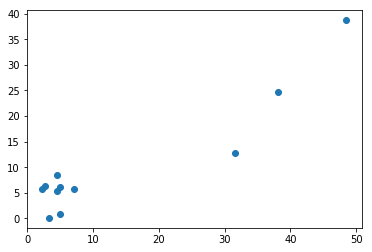

In [40]:
plt.scatter(tral_bom_2012["2012_trab_inf"], tral_bom_2012['2012_alfab'])

In [41]:
tral_ruim_2012 = TI_org_ruins_2012.join(AF_org_ruins_2012, how='inner', lsuffix='_trab_inf', rsuffix='_alfab')
tral_ruim_2012.head()

,2012_trab_inf,2012_alfab
country,,
Albania,NaN,9.53
Azerbaijan,NaN,10.70
Benin,24.1,4.49
Bolivia,NaN,10.10
Burundi,NaN,NaN


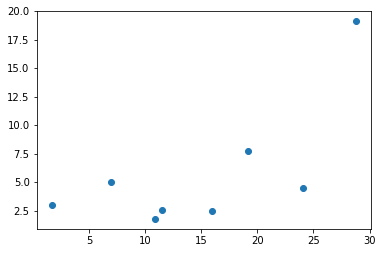

In [42]:
plt.scatter(tral_ruim_2012["2012_trab_inf"], tral_ruim_2012['2012_alfab'])

Juntando os gráficos para realizar analises:

Países bons e ruins- ano 2006:

Ajuste linear entre X3 e X4:
Coeficiente linear: -0.5297482706085788
Coeficiente angular: 0.63882741215298
Ajuste linear entre X3 e X4:
Coeficiente linear: 5.51376458628118
Coeficiente angular: 0.32708442105852953


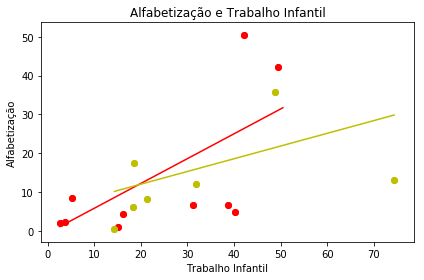

In [46]:
def reta_2006(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Alfabetização e Trabalho Infantil')
    plt.xlabel('Trabalho Infantil')
    plt.ylabel('Alfabetização')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

plt.scatter(tral_bom["2006_trab_inf"], tral_bom['2006_alfab'], color='r')
reta_2006(tral_bom["2006_trab_inf"], tral_bom['2006_alfab'], 'r')
plt.scatter(tral_ruim["2006_trab_inf"], tral_ruim['2006_alfab'], color='y')
reta_2006(tral_ruim["2006_trab_inf"], tral_ruim['2006_alfab'], 'y')


Ajuste linear entre X3 e X4:
Coeficiente linear: -0.5119946400703075
Coeficiente angular: 0.627861313322987
Ajuste linear entre X3 e X4:
Coeficiente linear: 8.346299951787923
Coeficiente angular: 0.17236235123004093


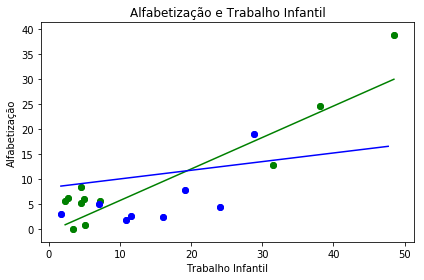

In [45]:
def reta_2012(dados_x, dados_y, c):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('Alfabetização e Trabalho Infantil')
    plt.xlabel('Trabalho Infantil')
    plt.ylabel('Alfabetização')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)

    plt.tight_layout()

plt.scatter(tral_bom_2012["2012_trab_inf"], tral_bom_2012['2012_alfab'], color='g')
reta_2012(tral_bom_2012["2012_trab_inf"], tral_bom_2012['2012_alfab'], 'g')
plt.scatter(tral_ruim_2012["2012_trab_inf"], tral_ruim_2012['2012_alfab'], color='b')
reta_2012(tral_ruim_2012["2012_trab_inf"], tral_ruim_2012['2012_alfab'], 'b')
    
